# WEATHER PREDICTION 
                ` *Using Machine Learning `

_Weather forecasting, the prediction of the weather through application of the principles of physics, supplemented by a variety of statistical and empirical techniques._

### _The model is trained on past weather data
# importing libraries and reading the dataset _

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

In [2]:
data=pd.read_csv('../input/weather-prediction/seattle-weather.csv')

In [3]:
data.sample(10)

,date,precipitation,temp_max,temp_min,wind,weather
187,2012-07-06,0.0,25.0,11.1,2.1,sun
12,2012-01-13,0.0,5.0,-2.8,1.3,sun
383,2013-01-18,0.0,3.3,-1.1,1.3,drizzle
514,2013-05-29,5.6,16.1,9.4,4.0,rain
1319,2015-08-12,7.6,28.3,16.7,2.7,rain
1170,2015-03-16,1.0,13.9,6.1,3.0,rain
736,2014-01-06,0.3,7.8,-0.5,2.6,rain
853,2014-05-03,33.3,15.0,8.9,3.4,rain
920,2014-07-09,0.0,26.7,13.9,2.3,sun
403,2013-02-07,1.3,9.4,3.3,4.1,rain


In [4]:
data.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [6]:
data.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

## _Hence there is no missing data found in the dataset_

## Now converting data data type to date time format

In [7]:
data['date'] = pd.to_datetime(data['date'])

In [8]:
data.sample(10)

,date,precipitation,temp_max,temp_min,wind,weather
468,2013-04-13,9.4,10.6,3.3,5.7,rain
704,2013-12-05,0.0,1.1,-4.9,2.6,sun
216,2012-08-04,0.0,33.9,16.7,3.7,sun
1235,2015-05-20,0.0,23.3,10.6,1.8,fog
596,2013-08-19,0.0,26.7,15.6,3.0,sun
1157,2015-03-03,0.0,10.6,0.0,2.1,sun
926,2014-07-15,0.0,31.1,13.9,2.3,sun
801,2014-03-12,0.0,16.1,3.3,1.9,fog
675,2013-11-06,3.8,12.8,7.8,1.7,rain
700,2013-12-01,3.0,13.3,7.8,8.8,rain


### Count number of distinct elements in specified axis.

In [9]:
data.nunique()

date             1461
precipitation     111
temp_max           67
temp_min           55
wind               79
weather             5
dtype: int64

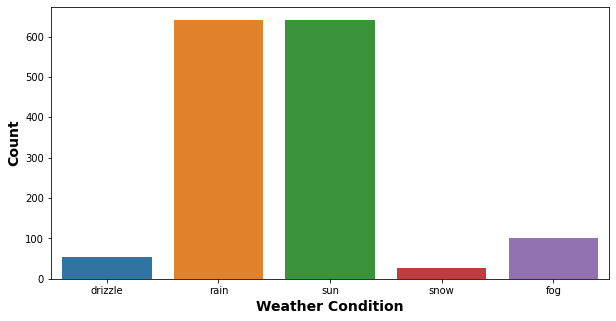

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'weather',data = data)
plt.xlabel("Weather Condition",fontweight='bold',size=14)
plt.ylabel("Count",fontweight='bold',size=14)
plt.show()

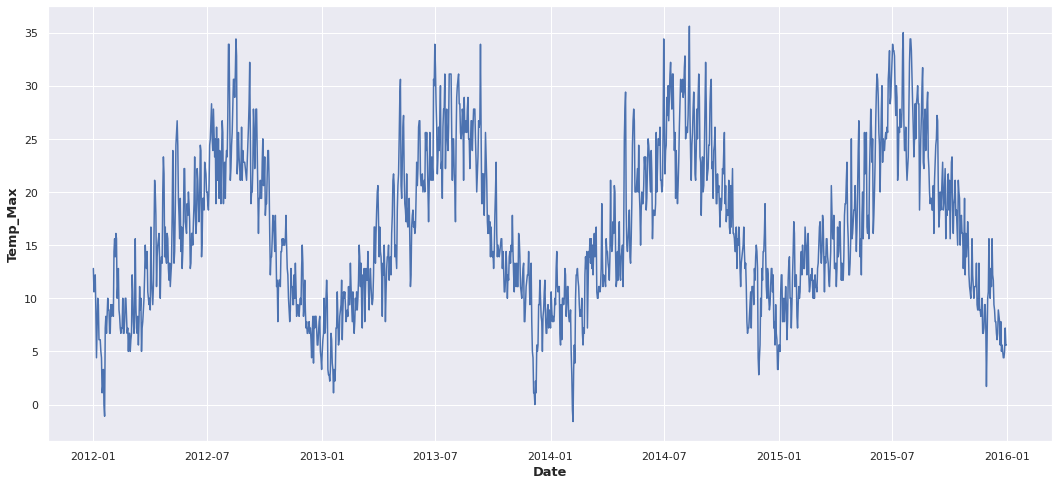

In [11]:
plt.figure(figsize=(18,8))
sns.set_theme()
sns.lineplot(x = 'date',y='temp_max',data=data)
plt.xlabel("Date",fontweight='bold',size=13)
plt.ylabel("Temp_Max",fontweight='bold',size=13)
plt.show()

<Figure size 1008x576 with 0 Axes>

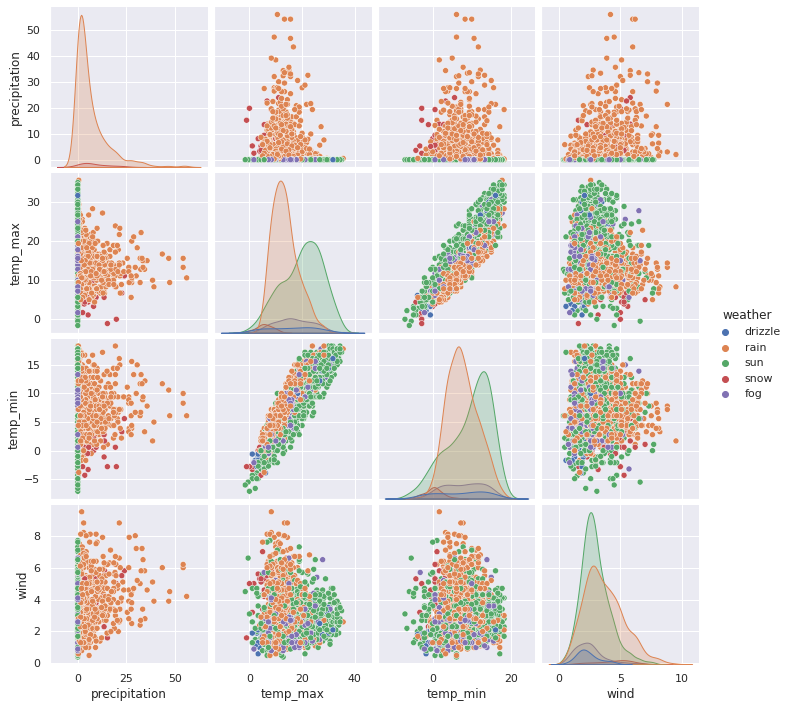

In [12]:
plt.figure(figsize=(14,8))
sns.pairplot(data.drop('date',axis=1),hue='weather')
plt.show()

In [13]:
classes={
        'drizzle':0,
        'fog':1,
        'rain':2,
        'snow':3,
        'sun':4
}

In [14]:
dataset=data.drop('date', axis=1)

In [15]:
dataset['weather']=dataset['weather'].astype('category')
dataset['weather']=dataset['weather'].cat.codes

## Preparing X data and Y data for model training

In [16]:
x = dataset.drop('weather',axis=1)
y = dataset['weather']

In [17]:
x

,precipitation,temp_max,temp_min,wind
0,0.0,12.8,5.0,4.7
1,10.9,10.6,2.8,4.5
2,0.8,11.7,7.2,2.3
3,20.3,12.2,5.6,4.7
4,1.3,8.9,2.8,6.1
...,...,...,...,...
1456,8.6,4.4,1.7,2.9
1457,1.5,5.0,1.7,1.3
1458,0.0,7.2,0.6,2.6
1459,0.0,5.6,-1.0,3.4


In [18]:
y

0       0
1       2
2       2
3       2
4       2
       ..
1456    2
1457    2
1458    1
1459    4
1460    4
Name: weather, Length: 1461, dtype: int8

# _Split the dataset into train and test_


In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state =42)

In [20]:
print("*"*40)
print("Shape of x training data : ",x_train.shape)
print("Shape of y training data : ",y_train.shape)
print("*"*40)
print("Shape of x testing data : ",x_test.shape)
print("Shape of y testing data : ",y_test.shape)
print("*"*40)

****************************************
Shape of x training data :  (1095, 4)
Shape of y training data :  (1095,)
****************************************
Shape of x testing data :  (366, 4)
Shape of y testing data :  (366,)
****************************************


In [21]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# **Predicting sun rain and snow only**

In [ ]:
index=df[df['weather']==0].index
df1 = df.drop(index=index,axis=0)
df1['weather']

1       2
2       2
3       2
4       2
5       2
       ..
1456    2
1457    2
1458    1
1459    4
1460    4
Name: weather, Length: 1408, dtype: int64

In [ ]:
index=df1[df1['weather']==1].index
df1 = df1.drop(index=index,axis=0)
df1['weather']

1       2
2       2
3       2
4       2
5       2
       ..
1455    4
1456    2
1457    2
1459    4
1460    4
Name: weather, Length: 1307, dtype: int64

In [ ]:
x=df1.drop(['date','weather'],axis=1)
y=df1['weather']
y.value_counts()

2    641
4    640
3     26
Name: weather, dtype: int64

In [ ]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.fit_transform(xtest)

In [ ]:
rfc = RandomForestClassifier(n_estimators=200)

In [ ]:
rfc.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=200)

In [ ]:
rfc.score(xtest,ytest)

0.916030534351145

In [ ]:
rfc2 = cross_val_score(estimator = rfc, X = xtrain, y = ytrain, cv = 10)
rfc2.mean()

0.9493315018315016

**Almost 95% Accuracy if fog and drizzle are eliminated which caused variations**

<AxesSubplot:>

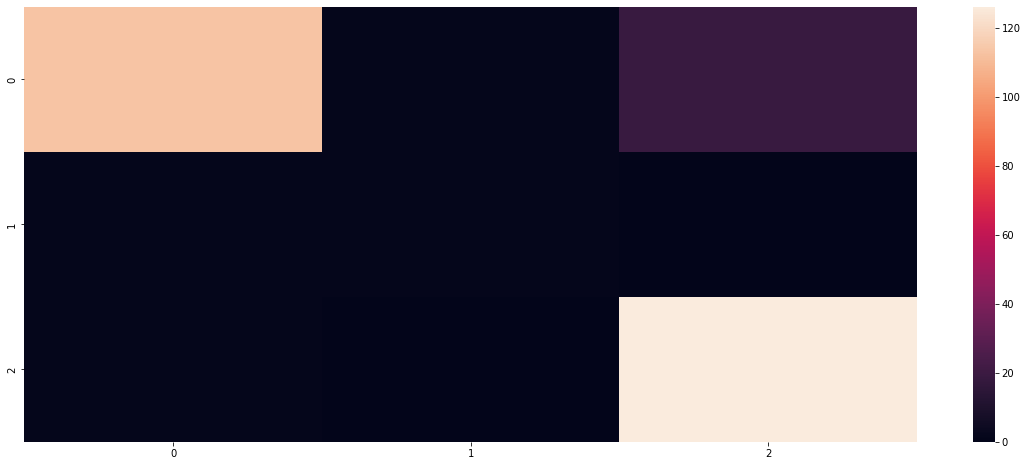

In [ ]:
yp = rfc.predict(xtest)
c=confusion_matrix(ytest,yp)
fig, ax = plt.subplots(figsize=(20, 8))
sns.heatmap(c,ax=ax)

In [ ]:
c

array([[113,   1,  19],
       [  1,   1,   0],
       [  1,   0, 126]])

# MODELS INCLUDED

In [22]:
# model
from sklearn.linear_model import LogisticRegression
classifier_log=LogisticRegression(random_state=0)
classifier_log.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [23]:
# model
from sklearn.neighbors import KNeighborsClassifier
classifier_knn=KNeighborsClassifier(n_neighbors = 5)
classifier_knn.fit(x_train,y_train)

KNeighborsClassifier()

In [24]:
# model 
from sklearn.svm import SVC
classifier_svc=SVC(kernel = 'linear', random_state=42)
classifier_svc.fit(x_train, y_train)

SVC(kernel='linear', random_state=42)

In [25]:
# model
from sklearn.naive_bayes import GaussianNB
classifier_gnb=GaussianNB()
classifier_gnb.fit(x_train, y_train,sample_weight=None)

GaussianNB()

In [26]:
# model
from sklearn.ensemble import RandomForestClassifier
classifier_rfc=RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
classifier_rfc.fit(x_train, y_train,sample_weight=None)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [27]:
# model
from sklearn.linear_model import SGDClassifier
classifier_sgdc=SGDClassifier()
classifier_sgdc.fit(x_train, y_train)

SGDClassifier()

In [28]:
# model
from sklearn.tree import DecisionTreeClassifier
classifier_dtc = DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier_dtc.fit(x_train, y_train,sample_weight=None)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [29]:
# model
from sklearn.ensemble import GradientBoostingClassifier
classifier_gbc=GradientBoostingClassifier()
classifier_gbc.fit(x_train,y_train)


GradientBoostingClassifier()

In [30]:
# model
from lightgbm import LGBMClassifier
classifier_lgbm=LGBMClassifier()
classifier_lgbm.fit(x_train, y_train)

LGBMClassifier()

In [31]:
# model
from xgboost.sklearn import XGBClassifier
classifier_xgb=XGBClassifier()
classifier_xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [32]:
classifier_list=[classifier_log,classifier_knn,classifier_svc,classifier_gnb,classifier_dtc,classifier_rfc,classifier_sgdc,classifier_gbc,classifier_lgbm,classifier_xgb]

In [33]:
# accuracy =correct answer(marks)/total marks

def accuracy(X_test, Y_test, classifier):
    print(f"\nclassifier\n{classifier}")
    Y_pred=classifier.predict(X_test)
    correct=0
    total=len(Y_pred)
    for i,j in zip(Y_pred, Y_test):
        if i==j:
            correct+=1
    acc=(correct/total)*100
    print("\n"+str(acc)+"\n"+"-"*30+"\n")
    print("\n"+"*"*50+"\n"+classification_report(Y_test,Y_pred)+"\n")
    cm=confusion_matrix(Y_test,Y_pred)
    print(f"Confusion Matrix\n{cm}\n")
    return acc

In [34]:
accuracy_list=[]
classifier_list_str=[]

In [35]:
for clf in classifier_list:
    acc=accuracy(x_test, y_test, clf)
    accuracy_list.append(acc)
    classifier_list_str.append(str(clf)[:6])    


classifier
LogisticRegression(random_state=0)

78.41530054644808
------------------------------


**************************************************
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.00      0.00      0.00        30
           2       0.89      0.84      0.87       161
           3       1.00      0.12      0.22         8
           4       0.70      0.96      0.81       156

    accuracy                           0.78       366
   macro avg       0.52      0.39      0.38       366
weighted avg       0.72      0.78      0.73       366


Confusion Matrix
[[  0   0   1   0  10]
 [  0   0   3   0  27]
 [  0   0 136   0  25]
 [  0   0   6   1   1]
 [  0   0   6   0 150]]


classifier
KNeighborsClassifier()

73.49726775956285
------------------------------


**************************************************
              precision    recall  f1-score   support

           0       0.20      0.09

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classificat

In [36]:
accuracy_list

[78.41530054644808,
 73.49726775956285,
 78.14207650273224,
 83.60655737704919,
 71.31147540983606,
 78.41530054644808,
 81.69398907103826,
 82.24043715846994,
 78.41530054644808,
 80.05464480874316]

In [37]:
classifier_list_str

['Logist',
 'KNeigh',
 'SVC(ke',
 'Gaussi',
 'Decisi',
 'Random',
 'SGDCla',
 'Gradie',
 'LGBMCl',
 'XGBCla']

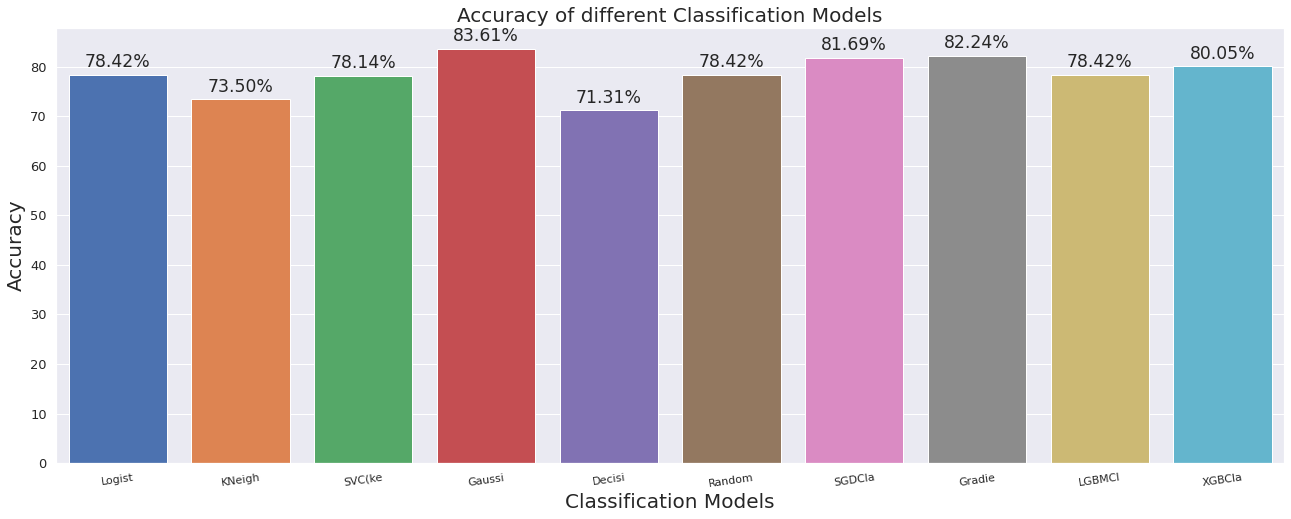

In [38]:
plt.figure(figsize=(22,8))
ax = sns.barplot(x=classifier_list_str, y=accuracy_list, saturation =1.5)
plt.xlabel("Classification Models", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of different Classification Models", fontsize = 20)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/100:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()